# Paths

In [1]:
import pandas as pd
from tvi_footballindex.parsing import f24_parser
from tvi_footballindex.tvi import calculator

In [2]:
f24_file_path = "data/F24 - CSVs/PRT-PrimeiraLiga_24-25_events.csv"

# Processing

In [3]:
# 1. Parse F24 data
match_events = f24_parser.parsef24_csv(f24_file_path)
match_events.head()

Processing: data/F24 - CSVs/PRT-PrimeiraLiga_24-25_events.csv


game_id     period  minute  second  expanded_minute event_name  \
0  1836567  FirstHalf       0     0.0                0      Start   
1  1836567  FirstHalf       0     0.0                0      Start   
2  1836567  FirstHalf       0     0.0                0       Pass   
3  1836567  FirstHalf       0     3.0                0       Pass   
4  1836567  FirstHalf       0     5.0                0       Pass   

   outcome_type  team_id      team  player_id          player     x     y  \
0    Successful      296  Sporting        NaN             NaN   0.0   0.0   
1    Successful      121   Rio Ave        NaN             NaN   0.0   0.0   
2    Successful      121   Rio Ave   436559.0         Clayton  49.9  50.5   
3  Unsuccessful      121   Rio Ave   149468.0  Amine Oudrhiri  44.3  51.8   
4  Unsuccessful      296  Sporting   509068.0  Geovany Quenda  30.9   4.6   

   end_x  end_y  goal_mouth_y  goal_mouth_z  blocked_x  blocked_y  \
0    NaN    NaN           NaN           NaN        NaN        NaN   
1    NaN    NaN           NaN           NaN        NaN        NaN   
2   39.3   46.4           NaN           NaN        NaN        NaN   
3   67.8   89.4           NaN           NaN        NaN        NaN   
4   45.7    0.0           NaN           NaN        NaN        NaN   

                                          qualifiers  is_touch is_shot  \
0                                                 []     False     NaN   
1                                                 []     False     NaN   
2  [{'type': {'displayName': 'Length', 'value': 2...      True     NaN   
3  [{'type': {'displayName': 'Angle', 'value': 21...      True     NaN   
4  [{'type': {'displayName': 'Angle', 'value': 21...      True     NaN   

  is_goal card_type  related_event_id  related_player_id  id  
0     NaN       NaN               NaN                NaN   0  
1     NaN       NaN               NaN                NaN   1  
2     NaN       NaN               NaN                NaN   2  
3     NaN       NaN               NaN                NaN   3  
4     NaN       NaN               NaN                NaN   4

In [4]:
# 2. Calculate player playtime
print("Calculating player playtime...")
play_time = f24_parser.calculate_player_playtime(match_events, min_playtime=30, from_processed=True)
play_time.head()

Calculating player playtime...


game_id  team_id player_id    position  play_time
0  1836567      296    376862  Goalkeeper       90.0
1  1836567      296    509068  Midfielder       90.0
2  1836567      296    425093  Midfielder       75.0
3  1836567      296    395992    Defender       90.0
4  1836567      296    443663    Defender       90.0

## Get Actions


Ações Defensivas
*   Interceção
*   Desarme (com sucesso)
*   Duelo aéreo ganho


Ações de Construção

*   Passe progressivo
*   Drible

Ações ofensivas
*   Passes chave
*   Deep completition (incluindo cruzamentos)
*   Remate à baliza





In [5]:
# Defensive Actions
interceptions = f24_parser.get_interceptions(match_events, from_processed=True)
tackles = f24_parser.get_tackles(match_events, from_processed=True)
aerials = f24_parser.get_aerials(match_events, from_processed=True)

# Possession Actions
progressive_passes = f24_parser.get_progressive_passes(match_events, from_processed=True)
dribbles = f24_parser.get_dribbles(match_events, from_processed=True)

# Offensive Actions
key_passes = f24_parser.get_key_passes(match_events, from_processed=True)
deep_completions = f24_parser.get_deep_completions(match_events, from_processed=True)
shots_on_target = f24_parser.get_shots_on_target(match_events, from_processed=True)

C:\Users\ldoutors\OneDrive - Capgemini\Documents\Personal\MastersBigDataFutebol\TVI_footballindex\tvi_footballindex\parsing\f24_parser.py:858: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  progressive_passes['event_name'] = 'progressive_pass'
C:\Users\ldoutors\OneDrive - Capgemini\Documents\Personal\MastersBigDataFutebol\TVI_footballindex\tvi_footballindex\parsing\f24_parser.py:801: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deep_completion['event_name'] = 'deep_completion'
C:\Users\ldoutors\OneDrive - C

In [6]:
# Combine all actions into a single DataFrame
all_metric_events = pd.concat([
    interceptions, tackles, aerials, progressive_passes, dribbles, key_passes, deep_completions, shots_on_target
])
all_metric_events['player_id'] = all_metric_events['player_id'].astype(int).astype(str)
all_metric_events

game_id  team_id player_id       event_name     x     y
0     1836567      296    425093     Interception  48.1  82.4
1     1836567      121    125953     Interception  26.7  33.3
2     1836567      121    362651     Interception  20.7   5.4
3     1836567      121    149468     Interception  55.4  22.9
4     1836567      121    362651     Interception  18.3  29.7
...       ...      ...       ...              ...   ...   ...
2445  1836819      251    397849  shots_on_target  78.1  57.4
2446  1836819      263    322631  shots_on_target  88.5  50.0
2447  1836819      251    531769  shots_on_target  94.5  56.3
2448  1836809      296    344378  shots_on_target  87.6  55.5
2449  1836809      296    362815  shots_on_target  92.7  45.7

[63353 rows x 6 columns]

## Calculate Metric (TVI)

The TVI (Tactical Versatility Index) metric is calculated as follows:

image.png

Where the action diversity is how many of the above mentioned actions the player did on that game. Only 1 action per type of action is considered.

C is the normalization constant, which in this case is 90/44 ~ 2.05, where 90 is the duration of a game, and 44 is the maximum number of possible distinct actions (pairs action, zone).

In [7]:
# Calculate TVI with the custom grid
tvi_df = calculator.calculate_tvi(
    all_metric_events, 
    play_time
)
tvi_df

game_id  team_id player_id  Aerial_1  Aerial_2  Aerial_3  Aerial_4  \
0     1836567      296    376862       0.0       0.0       0.0       0.0   
1     1836567      296    509068       0.0       0.0       0.0       0.0   
2     1836567      296    425093       0.0       0.0       0.0       0.0   
3     1836567      296    395992       0.0       0.0       0.0       1.0   
4     1836567      296    443663       1.0       0.0       0.0       0.0   
...       ...      ...       ...       ...       ...       ...       ...   
7232  1836817      936    416887       0.0       1.0       0.0       0.0   
7233  1836817      936    409025       0.0       0.0       0.0       0.0   
7234  1836817      297    478494       0.0       0.0       0.0       0.0   
7235  1836809      296    259929       0.0       1.0       0.0       1.0   
7236  1836809      107    384889       0.0       0.0       0.0       0.0   

      Aerial_5  Aerial_6  Interception_1  Interception_2  Interception_3  \
0          0.0       0.0             0.0             0.0             0.0   
1          0.0       0.0             0.0             0.0             0.0   
2          0.0       0.0             0.0             0.0             0.0   
3          0.0       0.0             0.0             0.0             0.0   
4          3.0       0.0             0.0             0.0             0.0   
...        ...       ...             ...             ...             ...   
7232       0.0       0.0             0.0             0.0             0.0   
7233       0.0       0.0             0.0             0.0             0.0   
7234       0.0       0.0             0.0             0.0             0.0   
7235       0.0       0.0             1.0             0.0             0.0   
7236       0.0       0.0             0.0             0.0             0.0   

      Interception_4  Interception_5  Interception_6  Tackle_1  Tackle_2  \
0                0.0             0.0             0.0       0.0       0.0   
1                1.0             0.0             0.0       0.0       2.0   
2                1.0             0.0             0.0       0.0       0.0   
3                0.0             0.0             0.0       0.0       0.0   
4                0.0             0.0             0.0       0.0       2.0   
...              ...             ...             ...       ...       ...   
7232             1.0             0.0             0.0       0.0       0.0   
7233             0.0             0.0             0.0       1.0       2.0   
7234             0.0             0.0             0.0       0.0       0.0   
7235             1.0             0.0             0.0       0.0       0.0   
7236             0.0             0.0             0.0       0.0       2.0   

      Tackle_3  Tackle_4  Tackle_5  Tackle_6  deep_completion_1  \
0          0.0       0.0       0.0       0.0                0.0   
1          0.0       0.0       0.0       1.0                0.0   
2          0.0       0.0       0.0       0.0                0.0   
3          0.0       0.0       0.0       0.0                0.0   
4          0.0       2.0       0.0       0.0                0.0   
...        ...       ...       ...       ...                ...   
7232       0.0       0.0       0.0       0.0                0.0   
7233       0.0       0.0       0.0       0.0                0.0   
7234       0.0       0.0       0.0       0.0                0.0   
7235       0.0       0.0       0.0       0.0                0.0   
7236       0.0       0.0       0.0       0.0                0.0   

      deep_completion_2  deep_completion_3  deep_completion_4  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
7232   

In [8]:
# Aggregate TVI by player
aggregated_tvi = calculator.aggregate_tvi_by_player(tvi_df)
aggregated_tvi

C:\Users\ldoutors\OneDrive - Capgemini\Documents\Personal\MastersBigDataFutebol\TVI_footballindex\tvi_footballindex\tvi\calculator.py:91: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tvi_final = tvi_final.drop(columns=['team_id', 'game_id', 'position'])\


player_id  Aerial_1  Aerial_2  Aerial_3  Aerial_4  Aerial_5  Aerial_6  \
270    421890  0.000000       0.0       2.0       0.0       2.0       0.0   
321    437687  0.000000       0.0       0.0       0.0       0.0       0.0   
294    425094  0.000000       0.0       0.0       0.0       0.0       0.0   
20     123872  0.000000       0.0       0.0       0.0       0.0       0.0   
68     299450  0.000000       0.0       0.5       0.0       0.0       0.5   
..        ...       ...       ...       ...       ...       ...       ...   
237    406957  0.181818       0.0       0.0       0.0       0.0       0.0   
83     322683  0.000000       0.0       0.0       0.0       0.0       0.0   
232    404768  0.000000       0.0       0.0       0.0       0.0       0.0   
208    397569  0.000000       0.0       0.0       0.0       0.0       0.0   
412    494902  0.000000       0.0       0.0       0.0       0.0       0.0   

     Interception_1  Interception_2  Interception_3  Interception_4  \
270             0.0             0.0             0.0             0.0   
321             0.0             0.0             0.0             0.0   
294             0.0             0.0             0.0             1.0   
20              0.0             0.5             0.0             0.0   
68              0.0             0.0             0.0             0.0   
..              ...             ...             ...             ...   
237             0.0             0.0             0.0             0.0   
83              0.0             0.0             0.0             0.0   
232             0.0             0.0             0.0             0.0   
208             0.0             0.0             0.0             0.0   
412             0.0             0.0             0.0             0.0   

     Interception_5  Interception_6  Tackle_1  Tackle_2  Tackle_3  Tackle_4  \
270             0.0             0.0       0.0       1.0       0.0       0.0   
321             0.0             0.0       0.0       0.0       0.0       1.0   
294             0.0             0.0       0.0       0.0       0.0       1.0   
20              0.0             0.0       0.0       0.5       0.0       0.0   
68              0.0             0.0       0.0       0.0       0.0       0.5   
..              ...             ...       ...       ...       ...       ...   
237             0.0             0.0       0.0       0.0       0.0       0.0   
83              0.0             0.0       0.0       0.0       0.0       0.0   
232             0.0             0.0       0.0       0.0       0.0       0.0   
208             0.0             0.0       0.0       0.0       0.0       0.0   
412             0.0             0.0       0.0       0.0       0.0       0.0   

     Tackle_5  Tackle_6  deep_completion_1  deep_completion_2  \
270       0.0       1.0                0.0                0.0   
321       0.0       0.0                0.0                0.0   
294       0.0       1.0                0.0                0.0   
20        0.0       0.0                0.0                0.0   
68        0.0       0.0                0.0                0.0   
..        ...       ...                ...                ...   
237       0.0       0.0                0.0                0.0   
83        0.0       0.0                0.0                0.0   
232       0.0       0.0                0.0                0.0   
208       0.0       0.0                0.0                0.0   
412       0.0       0.0                0.0                0.0   

     deep_completion_3  deep_completion_4  deep_completion_5  \
270                0.0                0.0                1.0   
321                0.0                0.0                2.0   
294                0.0                0.0                0.0   
20                 0.0                0.0                0.0   
68                 0.5                0.0                0.0   
..                 ...                ...                ...   
237                0.0                0.0       

In [11]:
# 5. Add player names and filter
print("Adding player names and filtering...")
player_names = (
    match_events[["player_id", "player", "team_id", "team"]].drop_duplicates().dropna()
)
player_names.rename(
    columns={"player": "player_name", "team": "team_name"}, inplace=True
)
aggregated_tvi['player_id'] = aggregated_tvi['player_id'].astype(int)
tvi_final = pd.merge(player_names, aggregated_tvi, on='player_id', how='right')
tvi_final.head(20)

Adding player names and filtering...


player_id       player_name  team_id             team_name  Aerial_1  \
0    421890.0    Bernardo Vital     2188               Estoril  0.000000   
1    437687.0     Tiago Gouveia      299               Benfica  0.000000   
2    425094.0      Tiago Mamede    28635    Estrela da Amadora  0.000000   
3    123872.0       André Sousa      936              Nacional  0.000000   
4    299450.0    Renato Sanches      299               Benfica  0.000000   
5    488322.0     Chiheb Labidi      936              Nacional  0.293194   
6    344378.0              Pote      296              Sporting  0.000000   
7    322689.0       André Horta      288                 Braga  0.000000   
8    472910.0        Manu Silva      107  Vitoria de Guimaraes  0.275103   
9    472910.0        Manu Silva      299               Benfica  0.275103   
10   376916.0            Morato      299               Benfica  0.000000   
11   439816.0         Petterson    28635    Estrela da Amadora  0.000000   
12   408941.0  Jordan Holsgrove     2188               Estoril  0.076401   
13   330958.0      Daniel Penha      936              Nacional  0.000000   
14   125452.0         Alan Ruiz    28635    Estrela da Amadora  0.050114   
15   135638.0       Tiago Silva      107  Vitoria de Guimaraes  0.076586   
16   535028.0    Rivaldo Morais      263               Farense  0.500000   
17   418749.0      Paulo Victor      263               Farense  0.479180   
18    23110.0    Ángel Di María      299               Benfica  0.000000   
19   401251.0   Rodrigo Zalazar      288                 Braga  0.133968   

    Aerial_2  Aerial_3  Aerial_4  Aerial_5  Aerial_6  Interception_1  \
0   0.000000  2.000000  0.000000  2.000000  0.000000        0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
4   0.000000  0.500000  0.000000  0.000000  0.500000        0.000000   
5   0.000000  0.235602  0.528796  0.235602  0.000000        0.235602   
6   0.106227  0.085470  0.000000  0.000000  0.000000        0.106227   
7   0.000000  0.126667  0.164444  0.000000  0.000000        0.000000   
8   0.123796  0.330124  0.795048  0.718019  0.123796        0.000000   
9   0.123796  0.330124  0.795048  0.718019  0.123796        0.000000   
10  0.000000  1.000000  1.000000  2.000000  0.000000        1.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
12  0.114601  0.336163  0.300934  0.033531  0.038200        0.191002   
13  0.051561  0.176471  0.398693  0.153232  0.142338        0.159768   
14  0.082764  0.399393  1.665907  0.068337  0.498861        0.000000   
15  0.035886  0.069584  0.271772  0.000000  0.036324        0.118162   
16  0.200000  0.000000  0.800000  0.000000  0.200000        0.000000   
17  0.360026  0.057655  0.384369  0.057655  0.168482        0.028828   
18  0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
19  0.117862  0.342606  1.006589  0.190337  0.363836        0.000000   

    Interception_2  Interception_3  Interception_4  Interception_5  \
0         0.000000        0.000000        0.000000        0.000000   
1         0.000000        0.000000        0.000000        0.000000   
2         0.000000        0.000000        1.000000        0.000000   
3         0.500000        0.000000        0.000000        0.000000   
4         0.000000        0.000000        0.000000        0.000000   
5         0.471204        0.000000        0.235602        0.000000   
6         0.000000        0.000000        0.186813        0.106227   
7         0.000000        0.000000        0.000000        0.126667   
8         0.339752        0.000000        1.045392        0.000000   
9         0.339752        0.000000        1.045392        0.000000   
10        0.000000        0.000000        2.000000        0.000000   
11        0.000000        1.000000        0.000000    

# Results deep dive

In [12]:
# filter out players with small playing time
time_threshold = 450 # minutes -> 5 full matches
tvi_final_wNames_filtered = tvi_final[tvi_final['play_time'] > time_threshold]\
  .sort_values('TVI', ascending=False).reset_index(drop=True)
tvi_final_wNames_filtered.head(20)

player_id         player_name  team_id             team_name  Aerial_1  \
0    344378.0                Pote      296              Sporting  0.000000   
1    472910.0          Manu Silva      107  Vitoria de Guimaraes  0.275103   
2    472910.0          Manu Silva      299               Benfica  0.275103   
3    408941.0    Jordan Holsgrove     2188               Estoril  0.076401   
4    330958.0        Daniel Penha      936              Nacional  0.000000   
5    125452.0           Alan Ruiz    28635    Estrela da Amadora  0.050114   
6    135638.0         Tiago Silva      107  Vitoria de Guimaraes  0.076586   
7    418749.0        Paulo Victor      263               Farense  0.479180   
8     23110.0      Ángel Di María      299               Benfica  0.000000   
9    401251.0     Rodrigo Zalazar      288                 Braga  0.133968   
10   424624.0        Zeki Amdouni      299               Benfica  0.000000   
11    36712.0         David Simão     5948                Arouca  0.072447   
12   447270.0    Brandon Aguilera      121               Rio Ave  0.133543   
13   127970.0          Rony Lopes      263               Farense  0.159433   
14   409279.0     Hidemasa Morita      296              Sporting  0.197745   
15   460758.0  Maximiliano Araújo      296              Sporting  0.000000   
16   421851.0        Nuno Moreira     9509           Casa Pia AC  0.056386   
17   447233.0       Alberto Costa      107  Vitoria de Guimaraes  0.285714   
18   447215.0    Gustavo Klismahn      251           Santa Clara  0.000000   
19   413187.0       Ismaël Gharbi      288                 Braga  0.000000   

    Aerial_2  Aerial_3  Aerial_4  Aerial_5  Aerial_6  Interception_1  \
0   0.106227  0.085470  0.000000  0.000000  0.000000        0.106227   
1   0.123796  0.330124  0.795048  0.718019  0.123796        0.000000   
2   0.123796  0.330124  0.795048  0.718019  0.123796        0.000000   
3   0.114601  0.336163  0.300934  0.033531  0.038200        0.191002   
4   0.051561  0.176471  0.398693  0.153232  0.142338        0.159768   
5   0.082764  0.399393  1.665907  0.068337  0.498861        0.000000   
6   0.035886  0.069584  0.271772  0.000000  0.036324        0.118162   
7   0.360026  0.057655  0.384369  0.057655  0.168482        0.028828   
8   0.000000  0.000000  0.000000  0.000000  0.000000        0.000000   
9   0.117862  0.342606  1.006589  0.190337  0.363836        0.000000   
10  0.124224  0.000000  0.453416  0.336957  0.000000        0.000000   
11  0.000000  0.046777  0.286366  0.000000  0.098118        0.178551   
12  0.000000  0.302435  0.208955  0.070699  0.000000        0.070699   
13  0.000000  0.000000  0.452613  0.079717  0.159433        0.000000   
14  0.234172  0.156114  0.410234  0.143972  0.000000        0.078057   
15  0.204179  0.082985  0.471045  0.000000  0.021493        0.000000   
16  0.103261  0.100543  0.093750  0.046875  0.160326        0.000000   
17  0.285714  0.142857  0.285714  0.000000  0.285714        0.000000   
18  0.000000  0.093535  0.471802  0.163686  0.000000        0.000000   
19  0.000000  0.000000  0.064687  0.000000  0.000000        0.000000   

    Interception_2  Interception_3  Interception_4  Interception_5  \
0         0.000000        0.000000        0.186813        0.106227   
1         0.339752        0.000000        1.045392        0.000000   
2         0.339752        0.000000        1.045392        0.000000   
3         0.305603        0.229202        0.458404        0.038200   
4         0.153958        0.000000        0.074074        0.050109   
5         0.056188        0.000000        0.000000        0.000000   
6         0.196937        0.170241        0.424070        0.078775   
7         0.837284        0.115311        0.393338        0.000000   
8         0.148241        0.000000        0.103643        0.050879   
9         0.059297        0.163982        0.054905        0.000000   
10        0.000000        0.105590        0.108696        0.000000   
11        0.

In [14]:
tvi_final_wNames_filtered[['player_name', 'team_name', 'position', 'action_diversity', 'play_time', 'TVI', 'TVI_entropy']].head(20)

player_name             team_name    position  action_diversity  \
0                 Pote              Sporting     Forward          8.869353   
1           Manu Silva  Vitoria de Guimaraes  Midfielder          8.954608   
2           Manu Silva               Benfica  Midfielder          8.954608   
3     Jordan Holsgrove               Estoril  Midfielder          9.789898   
4         Daniel Penha              Nacional  Midfielder          7.500363   
5            Alan Ruiz    Estrela da Amadora     Forward          7.682612   
6          Tiago Silva  Vitoria de Guimaraes  Midfielder          8.908972   
7         Paulo Victor               Farense    Defender          8.539398   
8       Ángel Di María               Benfica     Forward          7.969221   
9      Rodrigo Zalazar                 Braga  Midfielder          8.441435   
10        Zeki Amdouni               Benfica     Forward          7.481366   
11         David Simão                Arouca  Midfielder          8.092413   
12    Brandon Aguilera               Rio Ave  Midfielder          8.017282   
13          Rony Lopes               Farense  Midfielder          8.201949   
14     Hidemasa Morita              Sporting  Midfielder          7.409367   
15  Maximiliano Araújo              Sporting  Midfielder          7.677612   
16        Nuno Moreira           Casa Pia AC     Forward          7.650136   
17       Alberto Costa  Vitoria de Guimaraes    Defender          8.714286   
18    Gustavo Klismahn           Santa Clara  Midfielder          6.361761   
19       Ismaël Gharbi                 Braga  Midfielder          6.261930   

    play_time       TVI  TVI_entropy  
0       819.0  0.232268     0.036808  
1       727.0  0.227898     0.035578  
2       727.0  0.227898     0.035578  
3      2356.0  0.226597     0.034041  
4      1377.0  0.224302     0.039290  
5      1317.0  0.222096     0.038917  
6      2285.0  0.222001     0.033572  
7      1561.0  0.214897     0.034852  
8      1592.0  0.214567     0.035264  
9      1366.0  0.214129     0.035257  
10      644.0  0.212804     0.036010  
11     1753.0  0.212363     0.035933  
12     1273.0  0.208884     0.034646  
13     1129.0  0.201103     0.033752  
14     1153.0  0.200465     0.036412  
15     1675.0  0.199050     0.035110  
16     1472.0  0.198709     0.034779  
17      630.0  0.198052     0.032086  
18      727.0  0.196949     0.036909  
19      943.0  0.195218     0.038151

In [15]:
tvi_final_wNames_filtered[['player_name', 'team_name', 'position', 'action_diversity', 'play_time', 'TVI', 'TVI_entropy']].sort_values('TVI_entropy', ascending=False).head(20)

player_name             team_name    position  action_diversity  \
4        Daniel Penha              Nacional  Midfielder          7.500363   
5           Alan Ruiz    Estrela da Amadora     Forward          7.682612   
19      Ismaël Gharbi                 Braga  Midfielder          6.261930   
32       Leonel Bucca    Estrela da Amadora     Forward          6.158772   
23        João Novais               Rio Ave  Midfielder          6.351243   
28         Igor Jesus    Estrela da Amadora  Midfielder          6.490716   
18   Gustavo Klismahn           Santa Clara  Midfielder          6.361761   
0                Pote              Sporting     Forward          8.869353   
22        Bruno Costa              Nacional  Midfielder          6.594022   
14    Hidemasa Morita              Sporting  Midfielder          7.409367   
45  Mathias De Amorim             Famalicao  Midfielder          5.627517   
58             Madson            Moreirense  Midfielder          5.809140   
10       Zeki Amdouni               Benfica     Forward          7.481366   
11        David Simão                Arouca  Midfielder          8.092413   
78     Tunde Akinsola       AVS Futebol SAD  Midfielder          5.173679   
1          Manu Silva  Vitoria de Guimaraes  Midfielder          8.954608   
2          Manu Silva               Benfica  Midfielder          8.954608   
81      Fábio Ronaldo               Rio Ave  Midfielder          5.427673   
82      Fábio Ronaldo    Estrela da Amadora  Midfielder          5.427673   
8      Ángel Di María               Benfica     Forward          7.969221   

    play_time       TVI  TVI_entropy  
4      1377.0  0.224302     0.039290  
5      1317.0  0.222096     0.038917  
19      943.0  0.195218     0.038151  
32     1140.0  0.188397     0.037535  
23     1247.0  0.193555     0.037321  
28      754.0  0.189896     0.036913  
18      727.0  0.196949     0.036909  
0       819.0  0.232268     0.036808  
22      803.0  0.193592     0.036550  
14     1153.0  0.200465     0.036412  
45      894.0  0.183038     0.036305  
58     1116.0  0.177786     0.036141  
10      644.0  0.212804     0.036010  
11     1753.0  0.212363     0.035933  
78      927.0  0.172109     0.035667  
1       727.0  0.227898     0.035578  
2       727.0  0.227898     0.035578  
81      954.0  0.171527     0.035440  
82      954.0  0.171527     0.035440  
8      1592.0  0.214567     0.035264

In [ ]:
tvi_final_wNames_filtered[['player_name', 'team_name', 'position', 'action_diversity', 'play_time', 'TVI']].sort_values('action_diversity', ascending=False).head(20)

player_name          team_name    position  action_diversity  \
0       Gabriel Pires            Benfica  Midfielder         10.560948   
4              Otávio           FC Porto  Midfielder          9.579131   
12         Ryan Gauld         SC Farense  Midfielder          9.215508   
7     Sérgio Oliveira           FC Porto  Midfielder          8.997297   
1        Adel Taarabt            Benfica  Midfielder          8.956037   
16      Jonatan Lucca         SC Farense  Midfielder          8.779510   
10           Pedrinho        Gil Vicente  Midfielder          8.708840   
29         Rúben Lima         Belenenses    Defender          8.639016   
17            Willyan       Portimonense    Defender          8.634761   
2   Carlos Valenzuela       FC Famalicão  Midfielder          8.599436   
22            Kalindi        CD Nacional    Defender          8.555556   
8            Gilberto            Benfica    Defender          8.542069   
24       Jesús Corona           FC Porto  Midfielder          8.503813   
35           Paulinho           Boavista  Midfielder          8.334877   
45   Nahuel Ferraresi         Moreirense    Defender          8.280564   
3       Iuri Medeiros     Sporting Braga  Midfielder          8.224176   
25    Lucas Fernandes       Portimonense  Midfielder          8.218750   
18         Fali Candé       Portimonense     Forward          8.218110   
51   Maurício Antônio       Portimonense    Defender          8.179199   
49       Falaye Sacko  Vitória Guimarães    Defender          8.168213   

    play_time       TVI  
0       886.0  0.313975  
4      2003.0  0.232833  
12     2863.0  0.213619  
7      2220.0  0.220209  
1      1524.0  0.241589  
16     1796.0  0.209557  
10     1233.0  0.214001  
29     2845.0  0.198434  
17     2382.0  0.209526  
2       709.0  0.239454  
22     1215.0  0.203704  
8      1450.0  0.220063  
24     2098.0  0.202791  
35     2592.0  0.196496  
45     1914.0  0.191294  
3       910.0  0.236014  
25      576.0  0.202415  
18     1270.0  0.209377  
51     2846.0  0.186865  
49     2479.0  0.187301

# Views

In [ ]:
!pip install matplotsoccer
import matplotsoccer
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
  Created wheel for matplotsoccer: filename=matplotsoccer-0.0.8-py3-none-any.whl size=5966 sha256=67d365d1426dc15b493276edf19fca06a375b5534e72765b51c8d68071652e15
  Stored in directory: /root/.cache/pip/wheels/5f/96/51/a91e3de14cbbb035d664ca08bf412678bda3e5c7864f9ba66d
Successfully built matplotsoccer


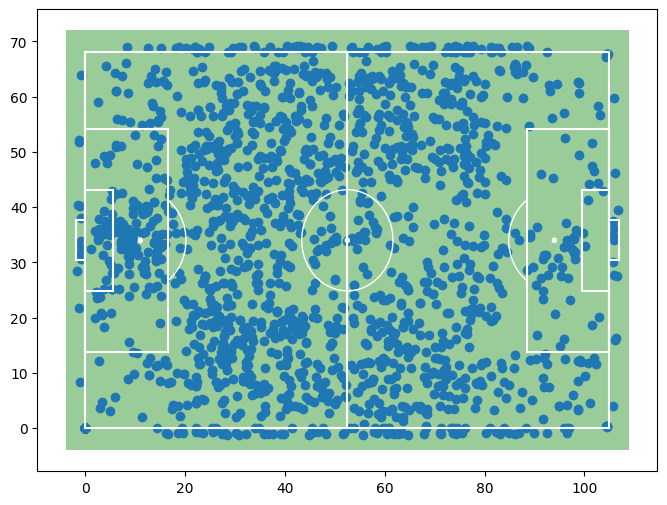

In [ ]:
matplotsoccer.field("green",figsize=8, show=False)
plt.scatter(match_events['x']*105/100,match_events['y']*68/100)
plt.axis("on")
plt.show()

In [ ]:
passes = explode_event(match_events, 1, 0.15)
passes['end_x'] = passes["Pass End X"].astype('float')*105/100
passes['end_y'] = passes["Pass End Y"].astype('float')*68/100
passes['start_x'] = passes["x"].astype('float')*105/100
passes['start_y'] = passes["y"].astype('float')*68/100
actions_df = passes.head(3)
matplotsoccer.actions(
    location=actions_df[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions_df.event_name,
    team=actions_df.team_id,
    result= actions_df.outcome == '1',
    label=actions_df[["sec", "event_name", "player_id", "team_id"]],
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)